given the values of F1 and B1, we find theta and r, which gives the poles of the filter. This filter/resonator is passed through an unit impulse response in Q1 and narrow triangular pulse train in Q2 to give us the desired output 'y/y1'. we finally plot y/y1[n] vs n for both the cases. triangular pulse is used to determine the audio output. for the audio output the range of freq values is fs/2=8000. In Q3 the values of F1,B1,f0 are changed and the corresponding outputs are observed for each case.

In Q4, the number of formants is changed to 3 which will change the number of roots of the filter. there will be 6 roots, having 3 pairs of identical roots corresponding to each of the theta and r values. the different sets of formant values will result into different vowel sounds. and the quality will differ for each f0 value.

transfer function for q1 = 1/(1-r_1*exp(-jtheta))
output function = y[n]=2r_1cos(theta_1)*y[n-1] - r^2*y[n-2]

transfer function for q2/q3 = 1/(1-r_1*exp(-jtheta))
output function = y[n]=2r_1cos(theta_1)*y[n-1] - r^2*y[n-2] + x[n] where x[n] is narrow triangular pulse train.








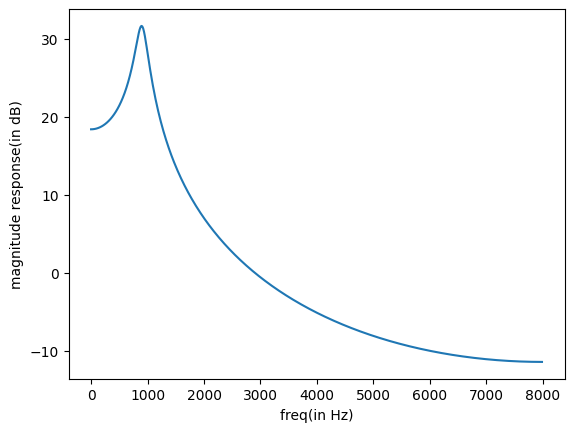

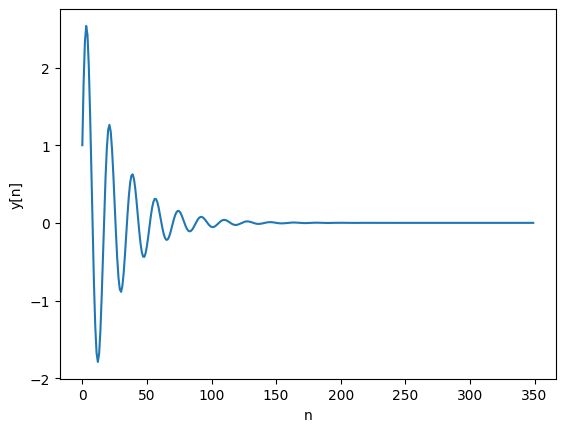

In [133]:
#Q1
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import freqz, impulse
import math

#parameters
F1 = 900 #formant
B1 = 200 #bandwidth
fs = 16000 #sampling frequency
T = 1/fs #sampling period
theta_1 = 2*np.pi*F1*T
r_1 = np.exp(-1*B1*np.pi*T)

NumCoeff = [1]
DenomCoeff = [1, -r_1*2*np.cos(theta_1), r_1**2]
w,h = freqz(NumCoeff, DenomCoeff)
freq = fs*w/(2*np.pi)
mag = 20 * np.log10(abs(h))

#print(mag)
n = np.arange(0,350,1)
y = np.zeros(len(n))
for i in range(len(n)):
  if i == 0:
    y[i] = 1
  elif i == 1:
   y[i] = 2*r_1*np.cos(theta_1)
  else :
   y[i] = 2*r_1*np.cos(theta_1)*y[i-1] - ((r_1**2)*y[i-2])

plt.plot(freq, mag)
plt.xlabel('freq(in Hz)')
plt.ylabel('magnitude response(in dB)')
plt.show()

plt.plot(n, y)
plt.xlabel('n')
plt.ylabel('y[n]')
plt.show()

-1.0
-0.96


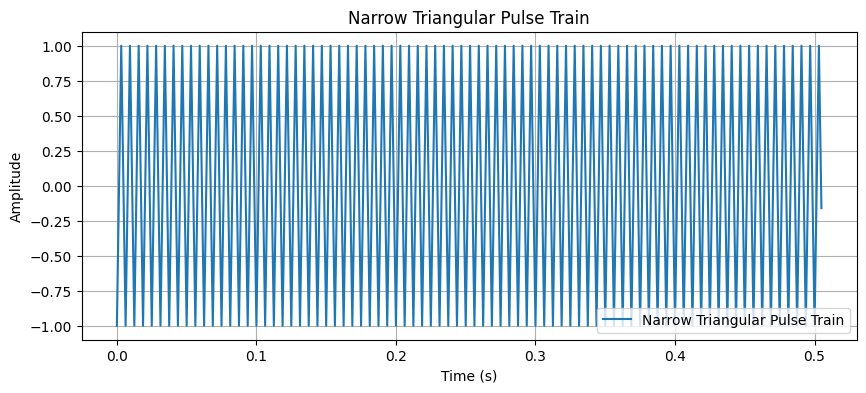

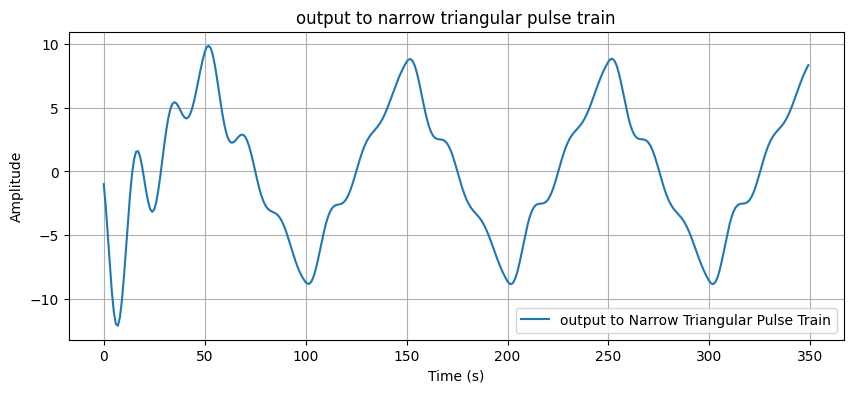

In [134]:
#Q2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

# Parameters
F1 = 900
B1 = 200
fs = 16000
T = 1/fs
theta_1 = 2*np.pi*F1*T
r_1 = np.exp(-1*B1*np.pi*T)
f0 = 160
duration = 0.505  # Duration of the signal in second
pulse_period = 1/f0 # Period of the pulse train

# Time values
t = np.linspace(0, duration, int(duration * fs), endpoint=False)

# Generate the narrow triangular pulse train
pulse_train = signal.sawtooth(2 * np.pi * f0 * t, 0.5)

n1 = np.arange(0,350,1)
y1 = np.zeros(len(n1))
for i in range(len(n1)):
  if i == 0:
    y1[i] = pulse_train[i]
  elif i == 1:
   y1[i] = 2*r_1*np.cos(theta_1)*y1[i-1] + pulse_train[i]
  else :
   y1[i] = 2*r_1*np.cos(theta_1)*y1[i-1] - ((r_1**2)*y1[i-2]) + pulse_train[i]

print(pulse_train[0])
print(pulse_train[1])
# Plot the pulse train
plt.figure(figsize=(10, 4))
plt.plot(t, pulse_train, label='Narrow Triangular Pulse Train')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Narrow Triangular Pulse Train')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(n1,y1, label='output to Narrow Triangular Pulse Train')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('output to narrow triangular pulse train')
plt.legend()
plt.grid()
plt.show()

In [135]:
#Q2
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import Audio

F1 = 900
B1 = 200
fs = 16000
T = 1/fs
theta_1 = 2*np.pi*F1*T
r_1 = np.exp(-1*B1*np.pi*T)
f0 = 160
duration = 0.505  # Duration of the signal in second
pulse_period = 1/f0 # Period of the pulse train

# Time values
t = np.linspace(0, duration, int(duration * fs), endpoint=False)

# Generate the narrow triangular pulse train
pulse_train = signal.sawtooth(2 * np.pi * f0 * t, 0.5)

n1 = np.arange(0,8000,1)
y1 = np.zeros(len(n1))
for i in range(len(n1)):
  if i == 0:
    y1[i] = pulse_train[i]
  elif i == 1:
   y1[i] = 2*r_1*np.cos(theta_1)*y1[i-1] + pulse_train[i]
  else :
   y1[i] = 2*r_1*np.cos(theta_1)*y1[i-1] - ((r_1**2)*y1[i-2]) + pulse_train[i]
Audio(data=y1, rate=fs)

the sound is produced similar to produced by close mouth



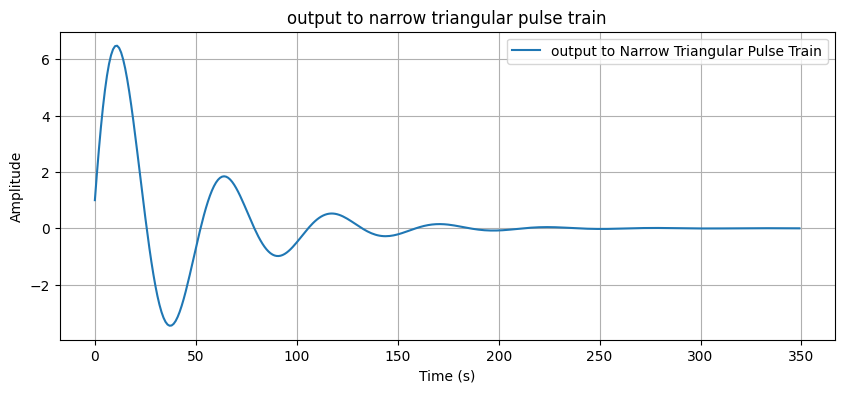

In [136]:
#Q3(a)-plotting
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import freqz, impulse

# Parameters
F1 = 300
B1 = 120
fs = 16000
T = 1/fs
theta_1 = 2*np.pi*F1*T
r_1 = np.exp(-1*B1*np.pi*T)
f0 = 120
duration = 0.505  # Duration of the signal in second
pulse_period = 1/f0 # Period of the pulse train

NumCoeff = [1]
DenomCoeff = [1, -r_1*2*np.cos(theta_1), r_1**2]
w,h = freqz(NumCoeff, DenomCoeff)
freq = fs*w/(2*np.pi)
mag = 20 * np.log10(abs(h))

#in case of impulse input
n = np.arange(0,350,1)
y = np.zeros(len(n))
for i in range(len(n)):
  if i == 0:
    y[i] = 1
  elif i == 1:
   y[i] = 2*r_1*np.cos(theta_1)
  else :
   y[i] = 2*r_1*np.cos(theta_1)*y[i-1] - ((r_1**2)*y[i-2])

y_a = y


#in case of narrow triangular pulse train
# Time values
t = np.linspace(0, duration, int(duration * fs), endpoint=False)

# Generate the narrow triangular pulse train
pulse_train = signal.sawtooth(2 * np.pi * f0 * t, 0.5)

n1 = np.arange(0,350,1)
y1 = np.zeros(len(n1))
for i in range(len(n1)):
  if i == 0:
    y1[i] = pulse_train[i]
  elif i == 1:
   y1[i] = 2*r_1*np.cos(theta_1)*y1[i-1] + pulse_train[i]
  else :
   y1[i] = 2*r_1*np.cos(theta_1)*y1[i-1] - ((r_1**2)*y1[i-2]) + pulse_train[i]

y1_a = y1

plt.figure(figsize=(10, 4))
plt.plot(n,y_a, label='output to Narrow Triangular Pulse Train')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('output to narrow triangular pulse train')
plt.legend()
plt.grid()
plt.show()


In [137]:
#Q3(b)-plotting
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import freqz, impulse

# Parameters
F1 = 1100
B1 = 200
fs = 16000
T = 1/fs
theta_1 = 2*np.pi*F1*T
r_1 = np.exp(-1*B1*np.pi*T)
f0 = 120
duration = 0.505  # Duration of the signal in second
pulse_period = 1/f0 # Period of the pulse train

NumCoeff = [1]
DenomCoeff = [1, -r_1*2*np.cos(theta_1), r_1**2]
w,h = freqz(NumCoeff, DenomCoeff)
freq = fs*w/(2*np.pi)
mag = 20 * np.log10(abs(h))

#in case of impulse input
n = np.arange(0,350,1)
y = np.zeros(len(n))
for i in range(len(n)):
  if i == 0:
    y[i] = 1
  elif i == 1:
   y[i] = 2*r_1*np.cos(theta_1)
  else :
   y[i] = 2*r_1*np.cos(theta_1)*y[i-1] - ((r_1**2)*y[i-2])

y_b = y


#in case of narrow triangular pulse train
# Time values
t = np.linspace(0, duration, int(duration * fs), endpoint=False)

# Generate the narrow triangular pulse train
pulse_train = signal.sawtooth(2 * np.pi * f0 * t, 0.5)

n1 = np.arange(0,350,1)
y1 = np.zeros(len(n1))
for i in range(len(n1)):
  if i == 0:
    y1[i] = pulse_train[i]
  elif i == 1:
   y1[i] = 2*r_1*np.cos(theta_1)*y1[i-1] + pulse_train[i]
  else :
   y1[i] = 2*r_1*np.cos(theta_1)*y1[i-1] - ((r_1**2)*y1[i-2]) + pulse_train[i]

y1_b = y1

In [138]:
#Q3(c)-plotting
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.signal import freqz, impulse

# Parameters
F1 = 300
B1 = 120
fs = 16000
T = 1/fs
theta_1 = 2*np.pi*F1*T
r_1 = np.exp(-1*B1*np.pi*T)
f0 = 180
duration = 0.505  # Duration of the signal in second
pulse_period = 1/f0 # Period of the pulse train

NumCoeff = [1]
DenomCoeff = [1, -r_1*2*np.cos(theta_1), r_1**2]
w,h = freqz(NumCoeff, DenomCoeff)
freq = fs*w/(2*np.pi)
mag = 20 * np.log10(abs(h))

#in case of impulse input
n = np.arange(0,350,1)
y = np.zeros(len(n))
for i in range(len(n)):
  if i == 0:
    y[i] = 1
  elif i == 1:
   y[i] = 2*r_1*np.cos(theta_1)
  else :
   y[i] = 2*r_1*np.cos(theta_1)*y[i-1] - ((r_1**2)*y[i-2])

y_c = y

#in case of narrow triangular pulse train
# Time values
t = np.linspace(0, duration, int(duration * fs), endpoint=False)

# Generate the narrow triangular pulse train
pulse_train = signal.sawtooth(2 * np.pi * f0 * t, 0.5)

n1 = np.arange(0,350,1)
y1 = np.zeros(len(n1))
for i in range(len(n1)):
  if i == 0:
    y1[i] = pulse_train[i]
  elif i == 1:
   y1[i] = 2*r_1*np.cos(theta_1)*y1[i-1] + pulse_train[i]
  else :
   y1[i] = 2*r_1*np.cos(theta_1)*y1[i-1] - ((r_1**2)*y1[i-2]) + pulse_train[i]

y1_c =y1


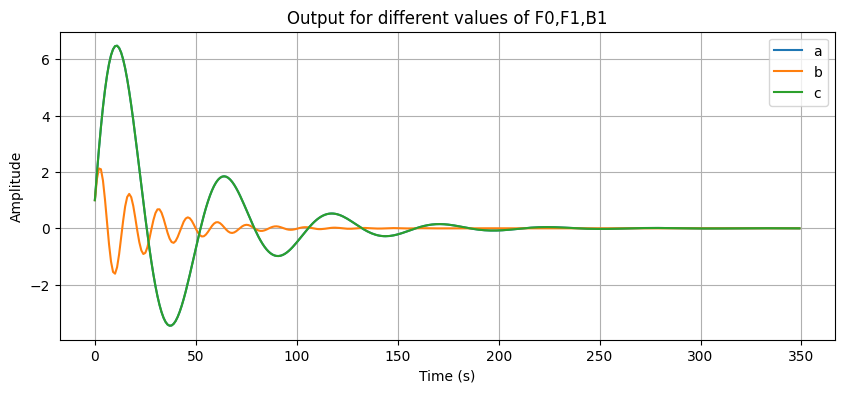

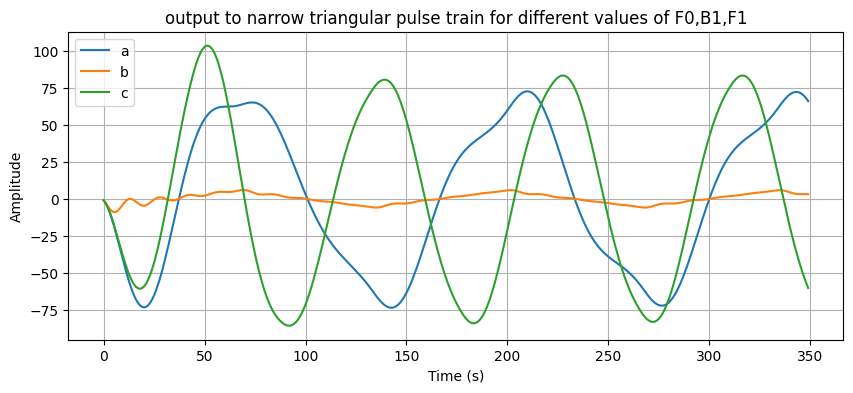

In [139]:
#plotting all three
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 4))
plt.plot(n,y_a, label='a' )
plt.plot(n,y_b, label='b')
plt.plot(n,y_c, label='c')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Output for different values of F0,F1,B1')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(n1,y1_a, label='a' )
plt.plot(n1,y1_b, label='b')
plt.plot(n1,y1_c, label='c')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('output to narrow triangular pulse train for different values of F0,B1,F1')
plt.legend()
plt.grid()
plt.show()

In [140]:
#sound Quality of all three

#Q3
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import Audio

F1 = 300
B1 = 120
fs = 16000
T = 1/fs
theta_1 = 2*np.pi*F1*T
r_1 = np.exp(-1*B1*np.pi*T)
f0 = 120
duration = 0.505  # Duration of the signal in second
pulse_period = 1/f0 # Period of the pulse train

# Time values
t = np.linspace(0, duration, int(duration * fs), endpoint=False)

# Generate the narrow triangular pulse train
pulse_train = signal.sawtooth(2 * np.pi * f0 * t, 0.5)

n1 = np.arange(0,8000,1)
y1 = np.zeros(len(n1))
for i in range(len(n1)):
  if i == 0:
    y1[i] = pulse_train[i]
  elif i == 1:
   y1[i] = 2*r_1*np.cos(theta_1)*y1[i-1] + pulse_train[i]
  else :
   y1[i] = 2*r_1*np.cos(theta_1)*y1[i-1] - ((r_1**2)*y1[i-2]) + pulse_train[i]
y1_a = y1
Audio(data=y1_a, rate=fs)

In [141]:
#sound Quality of all three

#Q3
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import Audio

F1 = 1100
B1 = 200
fs = 16000
T = 1/fs
theta_1 = 2*np.pi*F1*T
r_1 = np.exp(-1*B1*np.pi*T)
f0 = 120
duration = 0.505  # Duration of the signal in second
pulse_period = 1/f0 # Period of the pulse train

# Time values
t = np.linspace(0, duration, int(duration * fs), endpoint=False)

# Generate the narrow triangular pulse train
pulse_train = signal.sawtooth(2 * np.pi * f0 * t, 0.5)

n1 = np.arange(0,8000,1)
y1 = np.zeros(len(n1))
for i in range(len(n1)):
  if i == 0:
    y1[i] = pulse_train[i]
  elif i == 1:
   y1[i] = 2*r_1*np.cos(theta_1)*y1[i-1] + pulse_train[i]
  else :
   y1[i] = 2*r_1*np.cos(theta_1)*y1[i-1] - ((r_1**2)*y1[i-2]) + pulse_train[i]
y1_b = y1
Audio(data=y1_b, rate=fs)

In [142]:
#sound Quality of all three

#Q3
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import Audio

F1 = 300
B1 = 120
fs = 16000
T = 1/fs
theta_1 = 2*np.pi*F1*T
r_1 = np.exp(-1*B1*np.pi*T)
f0 = 180
duration = 0.505  # Duration of the signal in second
pulse_period = 1/f0 # Period of the pulse train

# Time values
t = np.linspace(0, duration, int(duration * fs), endpoint=False)

# Generate the narrow triangular pulse train
pulse_train = signal.sawtooth(2 * np.pi * f0 * t, 0.5)

n1 = np.arange(0,8000,1)
y1 = np.zeros(len(n1))
for i in range(len(n1)):
  if i == 0:
    y1[i] = pulse_train[i]
  elif i == 1:
   y1[i] = 2*r_1*np.cos(theta_1)*y1[i-1] + pulse_train[i]
  else :
   y1[i] = 2*r_1*np.cos(theta_1)*y1[i-1] - ((r_1**2)*y1[i-2]) + pulse_train[i]
y1_c = y1
Audio(data=y1_c, rate=fs)

sounds a and c sound similar whereas b sounds different than the two since b has different formant frequency its loudness is different.


transfer function for filter in q4 = 1/[(1-r*exp(-jtheta1))*(1-r*exp(-jtheta))*(1-r*exp(-jtheta))]
y[n] = x[n]-a1*y[n-1]-a2*y[n-2]-a3*y[n-3]-a4*y[n-4]-a5*y[n-5]

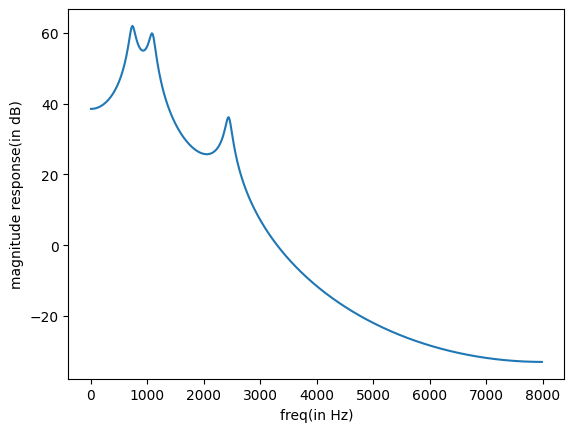

In [143]:
#Q4
#for vowel /a/ f0=120
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import zpk2tf,freqz,sawtooth,square,impulse
import math
from scipy import signal

f0 = 120
F1 = 730
F2 = 1090
F3 = 2440
B = 100
fs = 16000
T = 1/fs
theta1 = 2*np.pi*F1*T
theta2 = 2*np.pi*F2*T
theta3 = 2*np.pi*F3*T
duration = 0.505  # Duration of the signal in second
pulse_period = 1/f0 # Period of the pulse train

r = np.exp(-1*B*np.pi*T)


# Get poles and an equal number of zeros
poles = [r*np.exp(1j*theta1), r * np.exp(-1j*theta1), r * np.exp(1j*theta2), r * np.exp(-1j*theta2), r * np.exp(1j*theta3), r * np.exp(-1j*theta3)]

num = 1
den = np.poly(poles)

w, h = freqz(num, den)
freq = w * fs / (2 * np.pi)
mag = 20 * np.log10(abs(h))

t = np.linspace(0, duration, int(duration * fs), endpoint=False)

# Generate the narrow triangular pulse train
pulse_train = signal.sawtooth(2 * np.pi * f0 * t, 0.5)

n1 = np.arange(0,350,1)
y1 = np.zeros(len(n1))
for i in range(len(n1)):
  if i == 0:
    y1[i] = pulse_train[i]
  elif i == 1:
   y1[i] = -den[1]*y1[i-1] + pulse_train[i]
  elif i == 2:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2] + pulse_train[i]
  elif i == 3:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] + pulse_train[i]
  elif i == 4:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] + pulse_train[i]
  elif i == 5:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] + pulse_train[i]
  else :
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] - den[6]*y1[i-6] + pulse_train[i]

y1_a = y1

plt.plot(freq, mag)
plt.xlabel('freq(in Hz)')
plt.ylabel('magnitude response(in dB)')
plt.show()



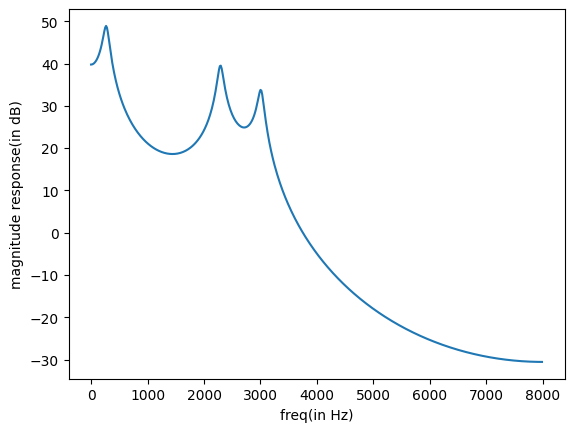

In [144]:
#Q4
#for vowel /i/ f0=120
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import zpk2tf,freqz,sawtooth,square,impulse
import math
from scipy import signal

f0 = 120
F1 = 270
F2 = 2290
F3 = 3010
B = 100
fs = 16000
T = 1/fs
theta1 = 2*np.pi*F1*T
theta2 = 2*np.pi*F2*T
theta3 = 2*np.pi*F3*T
duration = 0.505  # Duration of the signal in second
pulse_period = 1/f0 # Period of the pulse train

r = np.exp(-1*B*np.pi*T)


# Get poles and an equal number of zeros
poles = [r*np.exp(1j*theta1), r * np.exp(-1j*theta1), r * np.exp(1j*theta2), r * np.exp(-1j*theta2), r * np.exp(1j*theta3), r * np.exp(-1j*theta3)]

num = 1
den = np.poly(poles)

w, h = freqz(num, den)
freq = w * fs / (2 * np.pi)
mag = 20 * np.log10(abs(h))

t = np.linspace(0, duration, int(duration * fs), endpoint=False)

# Generate the narrow triangular pulse train
pulse_train = signal.sawtooth(2 * np.pi * f0 * t, 0.5)

n1 = np.arange(0,350,1)
y1 = np.zeros(len(n1))
for i in range(len(n1)):
  if i == 0:
    y1[i] = pulse_train[i]
  elif i == 1:
   y1[i] = -den[1]*y1[i-1] + pulse_train[i]
  elif i == 2:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2] + pulse_train[i]
  elif i == 3:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] + pulse_train[i]
  elif i == 4:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] + pulse_train[i]
  elif i == 5:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] + pulse_train[i]
  else :
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] - den[6]*y1[i-6] + pulse_train[i]

y1_i = y1

plt.plot(freq, mag)
plt.xlabel('freq(in Hz)')
plt.ylabel('magnitude response(in dB)')
plt.show()





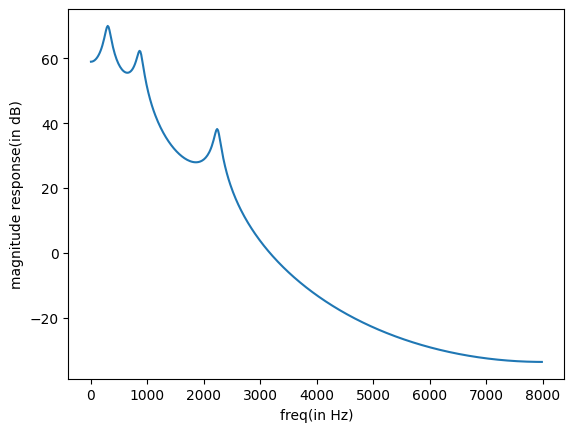

In [145]:
#Q4
#for vowel /u/ f0=120
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import zpk2tf,freqz,sawtooth,square,impulse
import math
from scipy import signal

f0 = 120
F1 = 300
F2 = 870
F3 = 2240
B = 100
fs = 16000
T = 1/fs
theta1 = 2*np.pi*F1*T
theta2 = 2*np.pi*F2*T
theta3 = 2*np.pi*F3*T
duration = 0.505  # Duration of the signal in second
pulse_period = 1/f0 # Period of the pulse train

r = np.exp(-1*B*np.pi*T)


# Get poles and an equal number of zeros
poles = [r*np.exp(1j*theta1), r * np.exp(-1j*theta1), r * np.exp(1j*theta2), r * np.exp(-1j*theta2), r * np.exp(1j*theta3), r * np.exp(-1j*theta3)]

num = 1
den = np.poly(poles)

w, h = freqz(num, den)
freq = w * fs / (2 * np.pi)
mag = 20 * np.log10(abs(h))

t = np.linspace(0, duration, int(duration * fs), endpoint=False)

# Generate the narrow triangular pulse train
pulse_train = signal.sawtooth(2 * np.pi * f0 * t, 0.5)

n1 = np.arange(0,350,1)
y1 = np.zeros(len(n1))
for i in range(len(n1)):
  if i == 0:
    y1[i] = pulse_train[i]
  elif i == 1:
   y1[i] = -den[1]*y1[i-1] + pulse_train[i]
  elif i == 2:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2] + pulse_train[i]
  elif i == 3:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] + pulse_train[i]
  elif i == 4:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] + pulse_train[i]
  elif i == 5:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] + pulse_train[i]
  else :
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] - den[6]*y1[i-6] + pulse_train[i]

y1_u = y1

plt.plot(freq, mag)
plt.xlabel('freq(in Hz)')
plt.ylabel('magnitude response(in dB)')
plt.show()


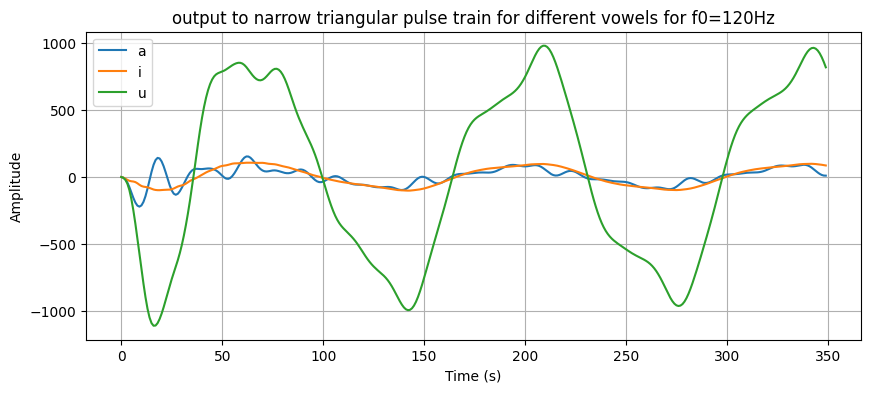

In [146]:
#plotting all three output
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(n1,y1_a, label='a' )
plt.plot(n1,y1_i, label='i')
plt.plot(n1,y1_u, label='u')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('output to narrow triangular pulse train for different vowels for f0=120Hz')
plt.legend()
plt.grid()
plt.show()

In [147]:
#sound Quality of all three(f=120Hz)

#Q3 - /i/
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import Audio

f0 = 120
F1 = 730
F2 = 1090
F3 = 2440
B = 100
fs = 16000
T = 1/fs
theta1 = 2*np.pi*F1*T
theta2 = 2*np.pi*F2*T
theta3 = 2*np.pi*F3*T
duration = 0.505  # Duration of the signal in second
pulse_period = 1/f0 # Period of the pulse train

r = np.exp(-1*B*np.pi*T)


# Get poles and an equal number of zeros
poles = [r*np.exp(1j*theta1), r * np.exp(-1j*theta1), r * np.exp(1j*theta2), r * np.exp(-1j*theta2), r * np.exp(1j*theta3), r * np.exp(-1j*theta3)]

num = 1
den = np.poly(poles)

w, h = freqz(num, den)
freq = w * fs / (2 * np.pi)
mag = 20 * np.log10(abs(h))

t = np.linspace(0, duration, int(duration * fs), endpoint=False)

# Generate the narrow triangular pulse train
pulse_train = signal.sawtooth(2 * np.pi * f0 * t, 0.5)

n1 = np.arange(0,8000,1)
y1 = np.zeros(len(n1))
for i in range(len(n1)):
  if i == 0:
    y1[i] = pulse_train[i]
  elif i == 1:
   y1[i] = -den[1]*y1[i-1] + pulse_train[i]
  elif i == 2:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2] + pulse_train[i]
  elif i == 3:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] + pulse_train[i]
  elif i == 4:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] + pulse_train[i]
  elif i == 5:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] + pulse_train[i]
  else :
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] - den[6]*y1[i-6] + pulse_train[i]

y1_a = y1

Audio(data=y1_a, rate=fs)

In [148]:
#sound Quality of all three(f0=120)

#Q3 - /i/
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import Audio

f0 = 120
F1 = 270
F2 = 2290
F3 = 3010
B = 100
fs = 16000
T = 1/fs
theta1 = 2*np.pi*F1*T
theta2 = 2*np.pi*F2*T
theta3 = 2*np.pi*F3*T
duration = 0.505  # Duration of the signal in second
pulse_period = 1/f0 # Period of the pulse train

r = np.exp(-1*B*np.pi*T)


# Get poles and an equal number of zeros
poles = [r*np.exp(1j*theta1), r * np.exp(-1j*theta1), r * np.exp(1j*theta2), r * np.exp(-1j*theta2), r * np.exp(1j*theta3), r * np.exp(-1j*theta3)]

num = 1
den = np.poly(poles)

w, h = freqz(num, den)
freq = w * fs / (2 * np.pi)
mag = 20 * np.log10(abs(h))

t = np.linspace(0, duration, int(duration * fs), endpoint=False)

# Generate the narrow triangular pulse train
pulse_train = signal.sawtooth(2 * np.pi * f0 * t, 0.5)

n1 = np.arange(0,8000,1)
y1 = np.zeros(len(n1))
for i in range(len(n1)):
  if i == 0:
    y1[i] = pulse_train[i]
  elif i == 1:
   y1[i] = -den[1]*y1[i-1] + pulse_train[i]
  elif i == 2:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2] + pulse_train[i]
  elif i == 3:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] + pulse_train[i]
  elif i == 4:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] + pulse_train[i]
  elif i == 5:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] + pulse_train[i]
  else :
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] - den[6]*y1[i-6] + pulse_train[i]

y1_i = y1

Audio(data=y1_i, rate=fs)


In [149]:
#sound Quality of all three(f=120)

#Q3 - /u/
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import Audio

f0 = 120
F1 = 300
F2 = 870
F3 = 2240
B = 100
fs = 16000
T = 1/fs
theta1 = 2*np.pi*F1*T
theta2 = 2*np.pi*F2*T
theta3 = 2*np.pi*F3*T
duration = 0.505  # Duration of the signal in second
pulse_period = 1/f0 # Period of the pulse train

r = np.exp(-1*B*np.pi*T)


# Get poles and an equal number of zeros
poles = [r*np.exp(1j*theta1), r * np.exp(-1j*theta1), r * np.exp(1j*theta2), r * np.exp(-1j*theta2), r * np.exp(1j*theta3), r * np.exp(-1j*theta3)]

num = 1
den = np.poly(poles)

w, h = freqz(num, den)
freq = w * fs / (2 * np.pi)
mag = 20 * np.log10(abs(h))

t = np.linspace(0, duration, int(duration * fs), endpoint=False)

# Generate the narrow triangular pulse train
pulse_train = signal.sawtooth(2 * np.pi * f0 * t, 0.5)

n1 = np.arange(0,8000,1)
y1 = np.zeros(len(n1))
for i in range(len(n1)):
  if i == 0:
    y1[i] = pulse_train[i]
  elif i == 1:
   y1[i] = -den[1]*y1[i-1] + pulse_train[i]
  elif i == 2:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2] + pulse_train[i]
  elif i == 3:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] + pulse_train[i]
  elif i == 4:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] + pulse_train[i]
  elif i == 5:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] + pulse_train[i]
  else :
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] - den[6]*y1[i-6] + pulse_train[i]

y1_u = y1

Audio(data=y1_u, rate=fs)

the

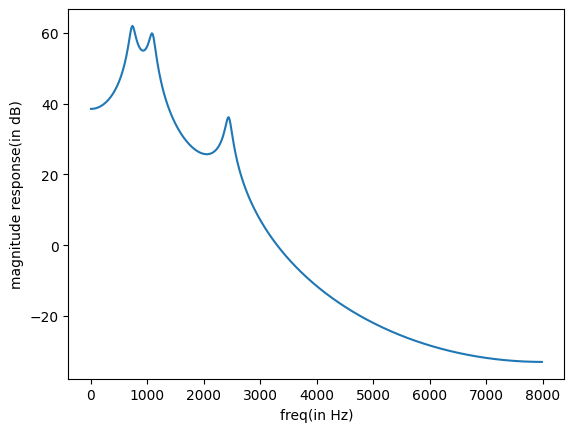

In [150]:
#Q4
#for vowel /a/ f0=220
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import zpk2tf,freqz,sawtooth,square,impulse
import math
from scipy import signal

f0 = 220
F1 = 730
F2 = 1090
F3 = 2440
B = 100
fs = 16000
T = 1/fs
theta1 = 2*np.pi*F1*T
theta2 = 2*np.pi*F2*T
theta3 = 2*np.pi*F3*T
duration = 0.505  # Duration of the signal in second
pulse_period = 1/f0 # Period of the pulse train

r = np.exp(-1*B*np.pi*T)


# Get poles and an equal number of zeros
poles = [r*np.exp(1j*theta1), r * np.exp(-1j*theta1), r * np.exp(1j*theta2), r * np.exp(-1j*theta2), r * np.exp(1j*theta3), r * np.exp(-1j*theta3)]

num = 1
den = np.poly(poles)

w, h = freqz(num, den)
freq = w * fs / (2 * np.pi)
mag = 20 * np.log10(abs(h))

t = np.linspace(0, duration, int(duration * fs), endpoint=False)

# Generate the narrow triangular pulse train
pulse_train = signal.sawtooth(2 * np.pi * f0 * t, 0.5)

n1 = np.arange(0,350,1)
y1 = np.zeros(len(n1))
for i in range(len(n1)):
  if i == 0:
    y1[i] = pulse_train[i]
  elif i == 1:
   y1[i] = -den[1]*y1[i-1] + pulse_train[i]
  elif i == 2:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2] + pulse_train[i]
  elif i == 3:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] + pulse_train[i]
  elif i == 4:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] + pulse_train[i]
  elif i == 5:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] + pulse_train[i]
  else :
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] - den[6]*y1[i-6] + pulse_train[i]

y1_a = y1

plt.plot(freq, mag)
plt.xlabel('freq(in Hz)')
plt.ylabel('magnitude response(in dB)')
plt.show()

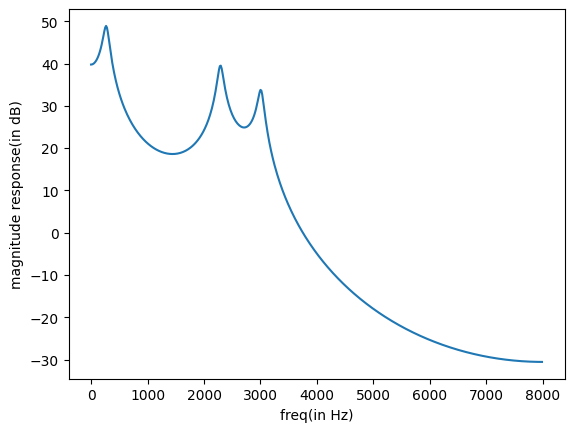

In [151]:
#Q4
#for vowel /i/ f0=220
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import zpk2tf,freqz,sawtooth,square,impulse
import math
from scipy import signal

f0 = 220
F1 = 270
F2 = 2290
F3 = 3010
B = 100
fs = 16000
T = 1/fs
theta1 = 2*np.pi*F1*T
theta2 = 2*np.pi*F2*T
theta3 = 2*np.pi*F3*T
duration = 0.505  # Duration of the signal in second
pulse_period = 1/f0 # Period of the pulse train

r = np.exp(-1*B*np.pi*T)


# Get poles and an equal number of zeros
poles = [r*np.exp(1j*theta1), r * np.exp(-1j*theta1), r * np.exp(1j*theta2), r * np.exp(-1j*theta2), r * np.exp(1j*theta3), r * np.exp(-1j*theta3)]

num = 1
den = np.poly(poles)

w, h = freqz(num, den)
freq = w * fs / (2 * np.pi)
mag = 20 * np.log10(abs(h))

t = np.linspace(0, duration, int(duration * fs), endpoint=False)

# Generate the narrow triangular pulse train
pulse_train = signal.sawtooth(2 * np.pi * f0 * t, 0.5)

n1 = np.arange(0,350,1)
y1 = np.zeros(len(n1))
for i in range(len(n1)):
  if i == 0:
    y1[i] = pulse_train[i]
  elif i == 1:
   y1[i] = -den[1]*y1[i-1] + pulse_train[i]
  elif i == 2:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2] + pulse_train[i]
  elif i == 3:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] + pulse_train[i]
  elif i == 4:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] + pulse_train[i]
  elif i == 5:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] + pulse_train[i]
  else :
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] - den[6]*y1[i-6] + pulse_train[i]

y1_i = y1

plt.plot(freq, mag)
plt.xlabel('freq(in Hz)')
plt.ylabel('magnitude response(in dB)')
plt.show()



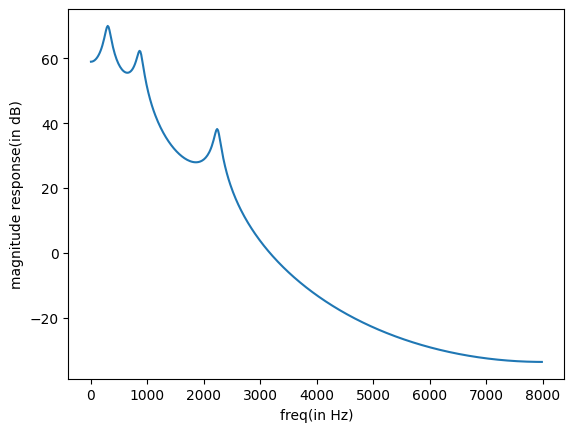

In [152]:
#Q4
#for vowel /u/ f0=220
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.signal import zpk2tf,freqz,sawtooth,square,impulse
import math
from scipy import signal

f0 = 220
F1 = 300
F2 = 870
F3 = 2240
B = 100
fs = 16000
T = 1/fs
theta1 = 2*np.pi*F1*T
theta2 = 2*np.pi*F2*T
theta3 = 2*np.pi*F3*T
duration = 0.505  # Duration of the signal in second
pulse_period = 1/f0 # Period of the pulse train

r = np.exp(-1*B*np.pi*T)


# Get poles and an equal number of zeros
poles = [r*np.exp(1j*theta1), r * np.exp(-1j*theta1), r * np.exp(1j*theta2), r * np.exp(-1j*theta2), r * np.exp(1j*theta3), r * np.exp(-1j*theta3)]

num = 1
den = np.poly(poles)

w, h = freqz(num, den)
freq = w * fs / (2 * np.pi)
mag = 20 * np.log10(abs(h))

t = np.linspace(0, duration, int(duration * fs), endpoint=False)

# Generate the narrow triangular pulse train
pulse_train = signal.sawtooth(2 * np.pi * f0 * t, 0.5)

n1 = np.arange(0,350,1)
y1 = np.zeros(len(n1))
for i in range(len(n1)):
  if i == 0:
    y1[i] = pulse_train[i]
  elif i == 1:
   y1[i] = -den[1]*y1[i-1] + pulse_train[i]
  elif i == 2:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2] + pulse_train[i]
  elif i == 3:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] + pulse_train[i]
  elif i == 4:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] + pulse_train[i]
  elif i == 5:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] + pulse_train[i]
  else :
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] - den[6]*y1[i-6] + pulse_train[i]

y1_u = y1

plt.plot(freq, mag)
plt.xlabel('freq(in Hz)')
plt.ylabel('magnitude response(in dB)')
plt.show()

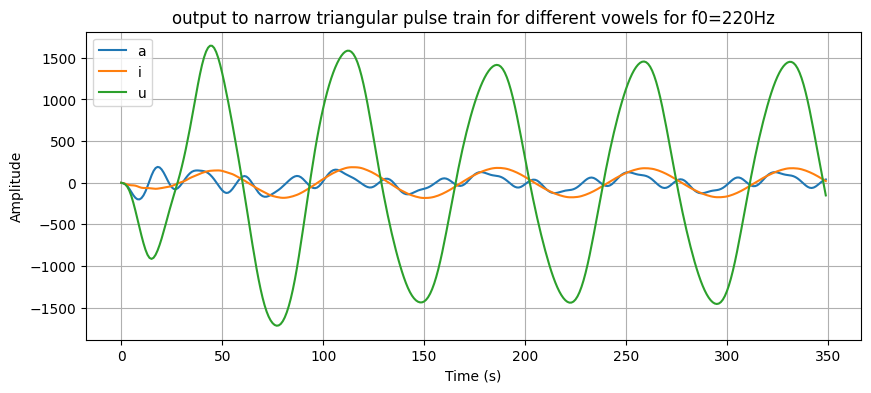

In [153]:
#plotting all three output
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(n1,y1_a, label='a' )
plt.plot(n1,y1_i, label='i')
plt.plot(n1,y1_u, label='u')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('output to narrow triangular pulse train for different vowels for f0=220Hz')
plt.legend()
plt.grid()
plt.show()

In [154]:
#sound Quality of all three(f0=220)

#Q3 - /i/
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import Audio

f0 = 220
F1 = 730
F2 = 1090
F3 = 2440
B = 100
fs = 16000
T = 1/fs
theta1 = 2*np.pi*F1*T
theta2 = 2*np.pi*F2*T
theta3 = 2*np.pi*F3*T
duration = 0.505  # Duration of the signal in second
pulse_period = 1/f0 # Period of the pulse train

r = np.exp(-1*B*np.pi*T)


# Get poles and an equal number of zeros
poles = [r*np.exp(1j*theta1), r * np.exp(-1j*theta1), r * np.exp(1j*theta2), r * np.exp(-1j*theta2), r * np.exp(1j*theta3), r * np.exp(-1j*theta3)]

num = 1
den = np.poly(poles)

w, h = freqz(num, den)
freq = w * fs / (2 * np.pi)
mag = 20 * np.log10(abs(h))

t = np.linspace(0, duration, int(duration * fs), endpoint=False)

# Generate the narrow triangular pulse train
pulse_train = signal.sawtooth(2 * np.pi * f0 * t, 0.5)

n1 = np.arange(0,8000,1)
y1 = np.zeros(len(n1))
for i in range(len(n1)):
  if i == 0:
    y1[i] = pulse_train[i]
  elif i == 1:
   y1[i] = -den[1]*y1[i-1] + pulse_train[i]
  elif i == 2:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2] + pulse_train[i]
  elif i == 3:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] + pulse_train[i]
  elif i == 4:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] + pulse_train[i]
  elif i == 5:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] + pulse_train[i]
  else :
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] - den[6]*y1[i-6] + pulse_train[i]

y1_a = y1

Audio(data=y1_a, rate=fs)

In [155]:
#sound Quality of all three(f0=220)

#Q3 - /i/
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import Audio

f0 = 220
F1 = 270
F2 = 2290
F3 = 3010
B = 100
fs = 16000
T = 1/fs
theta1 = 2*np.pi*F1*T
theta2 = 2*np.pi*F2*T
theta3 = 2*np.pi*F3*T
duration = 0.505  # Duration of the signal in second
pulse_period = 1/f0 # Period of the pulse train

r = np.exp(-1*B*np.pi*T)


# Get poles and an equal number of zeros
poles = [r*np.exp(1j*theta1), r * np.exp(-1j*theta1), r * np.exp(1j*theta2), r * np.exp(-1j*theta2), r * np.exp(1j*theta3), r * np.exp(-1j*theta3)]

num = 1
den = np.poly(poles)

w, h = freqz(num, den)
freq = w * fs / (2 * np.pi)
mag = 20 * np.log10(abs(h))

t = np.linspace(0, duration, int(duration * fs), endpoint=False)

# Generate the narrow triangular pulse train
pulse_train = signal.sawtooth(2 * np.pi * f0 * t, 0.5)

n1 = np.arange(0,8000,1)
y1 = np.zeros(len(n1))
for i in range(len(n1)):
  if i == 0:
    y1[i] = pulse_train[i]
  elif i == 1:
   y1[i] = -den[1]*y1[i-1] + pulse_train[i]
  elif i == 2:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2] + pulse_train[i]
  elif i == 3:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] + pulse_train[i]
  elif i == 4:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] + pulse_train[i]
  elif i == 5:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] + pulse_train[i]
  else :
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] - den[6]*y1[i-6] + pulse_train[i]

y1_i = y1

Audio(data=y1_i, rate=fs)


In [156]:
#sound Quality of all three(f=220)

#Q3 - /u/
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from IPython.display import Audio

f0 = 220
F1 = 300
F2 = 870
F3 = 2240
B = 100
fs = 16000
T = 1/fs
theta1 = 2*np.pi*F1*T
theta2 = 2*np.pi*F2*T
theta3 = 2*np.pi*F3*T
duration = 0.505  # Duration of the signal in second
pulse_period = 1/f0 # Period of the pulse train

r = np.exp(-1*B*np.pi*T)


# Get poles and an equal number of zeros
poles = [r*np.exp(1j*theta1), r * np.exp(-1j*theta1), r * np.exp(1j*theta2), r * np.exp(-1j*theta2), r * np.exp(1j*theta3), r * np.exp(-1j*theta3)]

num = 1
den = np.poly(poles)

w, h = freqz(num, den)
freq = w * fs / (2 * np.pi)
mag = 20 * np.log10(abs(h))

t = np.linspace(0, duration, int(duration * fs), endpoint=False)

# Generate the narrow triangular pulse train
pulse_train = signal.sawtooth(2 * np.pi * f0 * t, 0.5)

n1 = np.arange(0,8000,1)
y1 = np.zeros(len(n1))
for i in range(len(n1)):
  if i == 0:
    y1[i] = pulse_train[i]
  elif i == 1:
   y1[i] = -den[1]*y1[i-1] + pulse_train[i]
  elif i == 2:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2] + pulse_train[i]
  elif i == 3:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] + pulse_train[i]
  elif i == 4:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] + pulse_train[i]
  elif i == 5:
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] + pulse_train[i]
  else :
   y1[i] = -den[1]*y1[i-1] -den[2]*y1[i-2]- den[3]*y1[i-3] - den[4]*y1[i-4] - den[5]*y1[i-5] - den[6]*y1[i-6] + pulse_train[i]

y1_u = y1

Audio(data=y1_u, rate=fs)

Sound /a/ and /i/ does not change much for different f0 but there is a change in sound quality of /u/.